# Inferential statistics II - Bootstrapping

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [2]:
med_charges = pd.read_csv('data/insurance2.csv')

In [3]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [4]:
np.random.seed(47)
N_rep = 10000
charges= med_charges['charges']

bs_sample=np.empty(N_rep)

for i in range(N_rep):
    bs_sample[i]= np.mean(np.random.choice(charges, size= len(charges)))
    
print(np.percentile(bs_sample,5))

12724.467921704


__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__

In [5]:
def bootstrap_replicate_1d(data,func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [6]:
np.random.seed(47)
ins_charges = med_charges['charges'][med_charges['insuranceclaim']==1]
non_charges = med_charges['charges'][med_charges['insuranceclaim']==0]

In [7]:
bs_ins_charges = draw_bs_reps(ins_charges, np.std, 10000)
bs_non_charges = draw_bs_reps(non_charges, np.std, 10000)

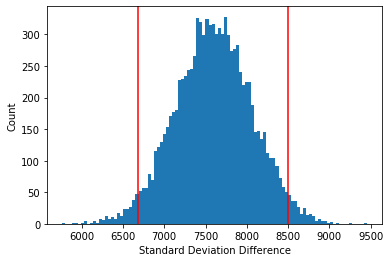

In [8]:
bs_diff = bs_ins_charges - bs_non_charges
plt.hist(bs_diff, bins=100)
plt.axvline(x = np.percentile(bs_diff,[2.5]), color='red')
plt.axvline(x = np.percentile(bs_diff,[97.5]), color='red')
plt.xlabel('Standard Deviation Difference')
plt.ylabel('Count')
plt.show()

In [9]:
np.percentile(bs_diff,[2.5,97.5])

array([6684.31447766, 8500.74902263])

In [10]:
np.std(ins_charges) - np.std(non_charges)

7596.256408655178

<p style="color:blue">\begin{equation}H_0: \sigma_{0} - \sigma_{1} = 0\end{equation}</p>
<p style="color:blue">\begin{equation}H_1:  \sigma_{0} - \sigma_{1} \neq 0\end{equation}</p>
<p style="color:blue">We would reject the null hypothesis as the confidence interval does not contain zero.</p>

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__

In [11]:
seed(47)
ins_charges_shifted = ins_charges - np.mean(ins_charges) + np.mean(charges)
non_charges_shifted = non_charges - np.mean(non_charges) + np.mean(charges)

In [12]:
bs_reps_ins = draw_bs_reps(ins_charges_shifted, np.mean, 10000)
bs_reps_non = draw_bs_reps(non_charges_shifted, np.mean, 10000)

In [13]:
bs_reps_diff = bs_reps_ins - bs_reps_non

In [14]:
np.percentile(bs_reps_diff,[2.5,97.5])

array([-1108.82667028,  1101.47479525])

In [15]:
p = (np.sum(bs_reps_diff >=(np.mean(ins_charges)- np.mean(non_charges)))/len(bs_reps_diff))
print('p =', p)

p = 0.0


<p style="color:blue">\begin{equation}H_0: \bar{x}_0 - \bar{x}_1 = 0\end{equation}</p>
<p style="color:blue">\begin{equation}H_1:  \bar{x}_0 - \bar{x}_1 \neq 0\end{equation}</p>
<p style="color:blue">We would reject the null hypothesis as the p-value is less than 5%.</p>

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__

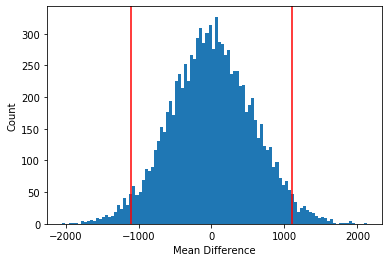

In [16]:
plt.hist(bs_reps_diff, bins=100)
plt.axvline(x = np.percentile(bs_reps_diff,[2.5]), color='red')
plt.axvline(x = np.percentile(bs_reps_diff,[97.5]), color='red')
plt.xlabel('Mean Difference')
plt.ylabel('Count')
plt.show()

<p style="color:blue">We would plot more than one line because we will need to perform a two tailed test.</p>

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__
<p style="color:blue">No, it is highly unlikely we will observe this value which would require a large number of replicates (and time)</p>

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__
<p style="color:blue">I would use the variant in which we indicad theat the standard deviationss are not equal.</p>

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__
<p style="color:blue">No, I would perform a one-sided test.</p>
<p style="color:blue">\begin{equation}H_0: \rho_0 - \rho_1 = 0\end{equation}</p>
<p style="color:blue">\begin{equation}H_1:  \rho_0 - \rho_1 \neq 0\end{equation}</p>
<p style="color:blue">The consequence of rejecting the null hypothesis woulb be that the new algoithm was successful.</p>